<a href="https://colab.research.google.com/github/seydouba95/Cassava-projet_IA/blob/main/projet_PIF6004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Run mode

In [ ]:
test_only = True

# 2.Librairies

In [ ]:
import pandas as pd
import os, shutil
import albumentations as A
import random
from keras import layers, models, optimizers
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ReduceLROnPlateau, ModelCheckpoint ,EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB5
from PIL import Image
from sklearn.utils import shuffle
import cv2
from keras.models import load_model
from keras.utils import np_utils , Sequence
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import json




# 3.Connect To GDrive

## 3.1.Monter le disque drive

In [ ]:
if not test_only:

  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)

## 3.2.Connect to Google Cloud SDK

In [ ]:
#Authenticate to GDrive
# Authenticate and create the PyDrive client.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Mounted at /content/drive


# 4.Explore data

## 4.1.Dowload data

In [ ]:
id_data = "1E2A0BnxbStRV5hRjLevGuKvXZIuP8_RU"
id_train_images= "1--njG7vkBYLuROQwSWI8fUpBExwWZToN"
id_train = "1qVqVrozP0lw8Wi-x5TH3RTPHitOvfpFq"
id_csv = "1NYRZ0Y-g_dVqsz-3ydU8jDvOYrqfhN03"
#path_data_test = 'data_test.zip'
path_data = 'data.zip'
path_train_images = 'train_images.zip'  
path_train = 'train.zip'
path_csv = 'label_num_to_disease_map.zip'    

# Download if data.zip file does not exist
if os.path.isfile(path_data):
  print("archive data already downloaded")
  
else:
  print("Downloading data dataset (data.zip)...")
  downloaded = drive.CreateFile({'id':id_data})
  downloaded.GetContentFile(path_data)
  print("Donwload data finished")

# Download if train_images.zip file does not exist  
if os.path.isfile(path_train_images):
  print("archive train_images already downloaded")
else:
  print("Downloading train_images dataset (train_images.zip)...")
  downloaded = drive.CreateFile({'id':id_train_images})
  downloaded.GetContentFile(path_train_images)
  print("Donwload train_images finished")  


# Download if train.zip file does not exist
if os.path.isfile(path_train):
  print("archive train already downloaded")
  
else:
  print("Downloading train dataset (train.zip)...")
  downloaded = drive.CreateFile({'id':id_train})
  downloaded.GetContentFile(path_train)
  print("Donwload train finished")

# Download if  label_num_to_disease_map.zip file does not exist  
if os.path.isfile(path_csv):
  print("archive csv already downloaded")
else:
  print("Downloading csv dataset (label_num_to_disease_map.zip)...")
  downloaded = drive.CreateFile({'id':id_csv})
  downloaded.GetContentFile(path_csv)
  print("Donwload csv finished")  


Donwload data finished
Donwload train_images finished


##4.2.Extract data

In [ ]:
#Extract dataset archive

# Extract dataset archive
import zipfile

EXTRACT_PATH = "."

#extract data.zip
archive = zipfile.ZipFile(path_data, 'r')
archive.extractall(path=EXTRACT_PATH)
if os.path.isdir(EXTRACT_PATH):
  print("archive data successfully extracted")
else:
  print("Can't extract archive data")

#extract train_images.zip  
archive = zipfile.ZipFile(path_train_images, 'r')
archive.extractall(path=EXTRACT_PATH)
if os.path.isdir(EXTRACT_PATH):
  print("archive train_images successfully extracted")
else:
  print("Can't extract archive train_images")


  #extract train.zip  
archive = zipfile.ZipFile(path_train, 'r')
archive.extractall(path=EXTRACT_PATH)
if os.path.isdir(EXTRACT_PATH):
  print("archive train successfully extracted")
else:
  print("Can't extract archive train")


  #extract label_num__to_disease_json.zip  
archive = zipfile.ZipFile(path_csv, 'r')
archive.extractall(path=EXTRACT_PATH)
if os.path.isdir(EXTRACT_PATH):
  print("archive csv successfully extracted")
else:
  print("Can't extract archive csv")


archive data successfully extracted
archive train_images successfully extracted


## 4.3.Prepare data

In [ ]:
#path train and  path test
train_dir = 'data/train'
test_dir = 'data/test'


In [ ]:
# Setting up data configuration via ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.20,
                                  )                                  
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#ensemble de donnees train ,validation et test
img_width = 128
img_height = 128
num_classes = 5
batch_size = 22000 #permet de charger tous mes donnees dans la ram 
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                target_size=(img_width,img_height),
                                                color_mode="rgb",
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                                subset='training',
                                                shuffle = True,
                                                seed=42 , 
                                              
                                               )
valid_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                target_size=(img_width,img_height),
                                                color_mode="rgb",
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                                subset='validation',
                                                shuffle = True,
                                                seed=42)

test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                           target_size=(img_width,img_height),
                                           color_mode="rgb",
                                           batch_size = batch_size,
                                           class_mode='categorical',
                                           shuffle = False,
                                           seed=42,
                                          )

Found 13698 images belonging to 5 classes.
Found 3422 images belonging to 5 classes.
Found 4277 images belonging to 5 classes.


In [ ]:
#donnees sans transformation
x_train, y_train = train_generator.next()
x_val, y_val = valid_generator.next()
x_test, y_test = test_generator.next()
print("Train",x_train.shape)
print("Validation",x_val.shape)
print("Test",x_test.shape)
print("y_train",y_train.shape)
print("y_validation",y_val.shape)
print("y_test",y_test.shape)


Train (13698, 128, 128, 3)
Validation (3422, 128, 128, 3)
Test (4277, 128, 128, 3)
y_train (13698, 5)
y_validation (3422, 5)
y_test (4277, 5)


In [ ]:
#creation de cette classe pour transformer nos images 
class CustomSequence(tf.keras.utils.Sequence):

    def __init__(self, data_x, data_y, batch_size, shuffle=False,trans=False):
        """Custom data generator for model.fit_generator()
        
        Params:
            data_x - np.ndarray with features, shape (dataset_size, ...)
            data_y - np.ndarray with targets, shape (dataset_size, ...)
            batch_size - mini-batch size
            shuffle - shuffle features/targets between epochs
            
        Note:
            this class 'shuffle' param will shuffle all examples between epochs
            model.fit_generator(shuffle=...) param shufles order of mini-batches,
                but does not touch what is inside mini-batch
        """
        self.data_x = data_x
        self.data_y = data_y
        self.batch_size = batch_size
        self.indices = np.arange(len(self.data_x))
        self.shuffle = shuffle
        self.trans = trans 

        self.transform = A.Compose([
          A.HorizontalFlip(p=0.5), 
          A.VerticalFlip(p=0.5) ,
          A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
          A.RandomBrightnessContrast(brightness_limit=0.2,contrast_limit=0.2,p=0.5),
          A.RandomCrop(width=128, height=128,always_apply=False, p=1.0),
          ])
    
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.data_x) / self.batch_size))

    def __getitem__(self, idx):
        batch_i = self.indices[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_x = self.data_x[batch_i]
        batch_y = self.data_y[batch_i]
        #print("pre: ", batch_x.shape)
        if self.trans == True:
           batch_x = self.transform_images(batch_x)
        #print("post: ", batch_x.shape)
        return batch_x, batch_y


    def on_epoch_end(self):
        if self.shuffle:

            np.random.shuffle(self.indices)


    def transformed(self, image):
       augmented_image = self.transform(image=image)['image']

       return augmented_image

    def transform_images(self, batch_images):
        aug = np.zeros(batch_images.shape)
        for i in range(batch_images.shape[0]):
          aug[i] = self.transformed(batch_images[i]) 
        return aug


In [ ]:
#donnees transformees
train = CustomSequence(x_train, y_train, batch_size=64, shuffle=True,trans=True)
val = CustomSequence(x_val ,y_val , batch_size = 64 , shuffle = True ,trans=False)
test = CustomSequence(x_test, y_test, batch_size=1 ,shuffle = False,trans=False)

##4.4.visualize data

In [ ]:
path = "train.csv"
train_dataset = pd.read_csv(path)
train_dataset

image_id  label
0      1000015157.jpg      0
1      1000201771.jpg      3
2       100042118.jpg      1
3      1000723321.jpg      1
4      1000812911.jpg      3
...               ...    ...
21392   999068805.jpg      3
21393   999329392.jpg      3
21394   999474432.jpg      1
21395   999616605.jpg      4
21396   999998473.jpg      4

[21397 rows x 2 columns]

In [ ]:
path_json="label_num_to_disease_map.json"
print("label | Name")
with open(path_json) as f:
    label_diseases_name = json.load(f)
    
label_diseases_name = {int(k): v for k, v in label_diseases_name.items()}
label_diseases_name

label | Name


{0: 'Cassava Bacterial Blight (CBB)',
 1: 'Cassava Brown Streak Disease (CBSD)',
 2: 'Cassava Green Mottle (CGM)',
 3: 'Cassava Mosaic Disease (CMD)',
 4: 'Healthy'}

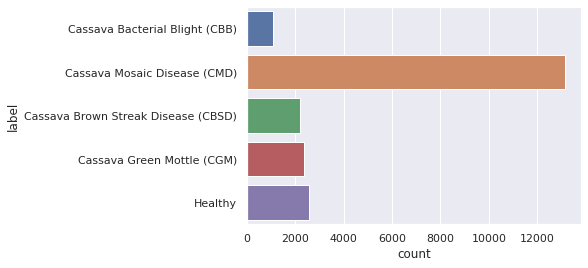

In [ ]:
sns.set_theme(style="darkgrid")
#plt.figure(figsize = (10, 6))
sns.countplot(y=train_dataset['label'].map(label_diseases_name), orient='v')
plt.show()

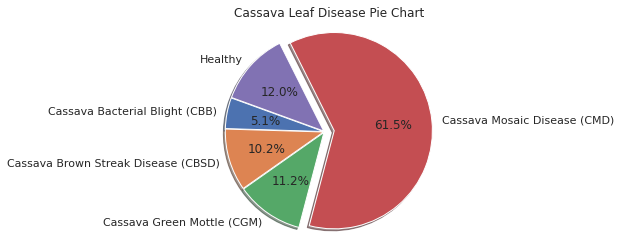

In [ ]:
# counting occurrences of each disease
detailed_labels =   label_diseases_name.values()
df = train_dataset.groupby('label').count()
#print('-- Number of images for each encoded disease --\n' + str(df))

labels = []
values = []
for i in range(0, df.shape[0]):
    labels.append(i)
    values.append(df.values[i][0])

#print('\nUnique number labels - ' + str(labels))
#print('Unique explained labels - ' + str(detailed_labels))
#print('Unique values - ' + str(values))

# plotting pie chart
fig, ax = plt.subplots()
ax.pie(values, autopct='%1.1f%%',
        labels = detailed_labels, shadow=True, startangle=160,
       explode = (0.01, 0.01, 0.01, 0.1, 0.01))
ax.axis('equal')
plt.title('Cassava Leaf Disease Pie Chart')
plt.savefig('histogramme.jpg')
plt.show()

In [ ]:
train_dataset["disease_type"] = train_dataset["label"].map(label_diseases_name)
train_dataset

image_id  label                         disease_type
0      1000015157.jpg      0       Cassava Bacterial Blight (CBB)
1      1000201771.jpg      3         Cassava Mosaic Disease (CMD)
2       100042118.jpg      1  Cassava Brown Streak Disease (CBSD)
3      1000723321.jpg      1  Cassava Brown Streak Disease (CBSD)
4      1000812911.jpg      3         Cassava Mosaic Disease (CMD)
...               ...    ...                                  ...
21392   999068805.jpg      3         Cassava Mosaic Disease (CMD)
21393   999329392.jpg      3         Cassava Mosaic Disease (CMD)
21394   999474432.jpg      1  Cassava Brown Streak Disease (CBSD)
21395   999616605.jpg      4                              Healthy
21396   999998473.jpg      4                              Healthy

[21397 rows x 3 columns]

In [ ]:
train_dataset_stat = train_dataset['disease_type'].value_counts()

train_dataset_stat 

Cassava Mosaic Disease (CMD)           13158
Healthy                                 2577
Cassava Green Mottle (CGM)              2386
Cassava Brown Streak Disease (CBSD)     2189
Cassava Bacterial Blight (CBB)          1087
Name: disease_type, dtype: int64

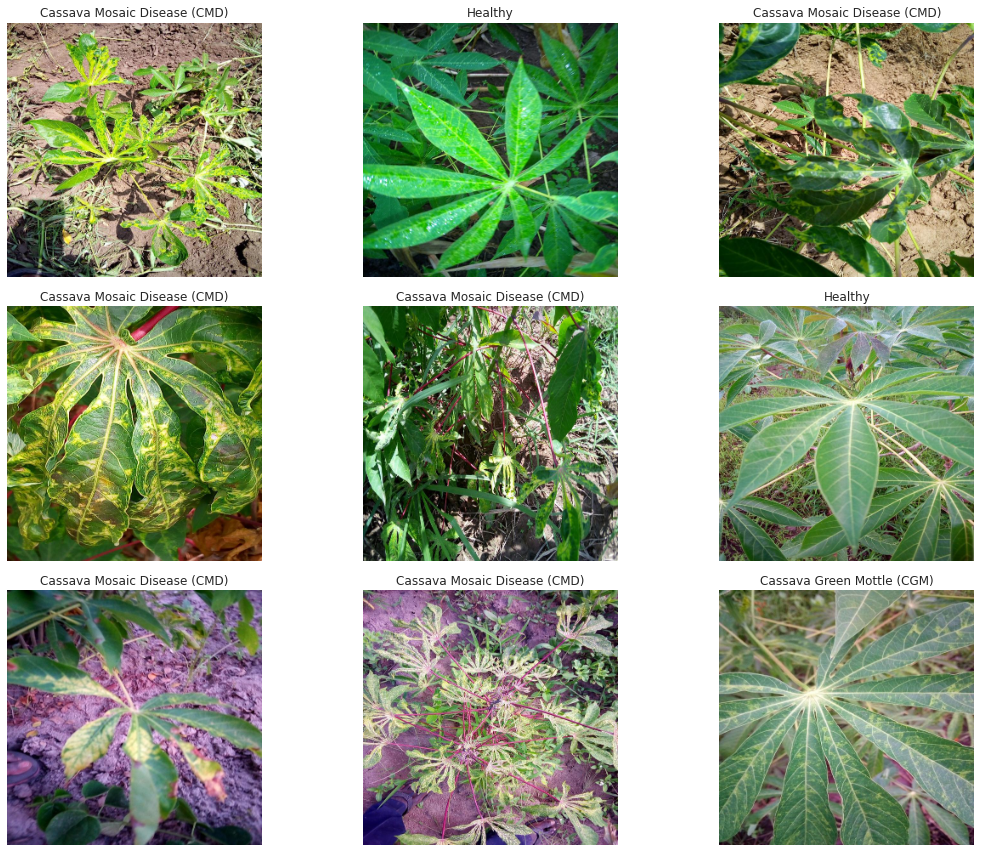

In [ ]:
with open(path_json, 'r') as file:
    labels = json.load(file)
    
labels

# defining some variables which will be useful later
TRAIN_PATH = 'train_images'
IMAGE_WIDTH = 300
IMAGE_HEIGHT = 300

plt.figure(figsize=(16, 12))
df_sample = train_dataset.sample(12).reset_index(drop=True)
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread(os.path.join(TRAIN_PATH, df_sample.image_id[i]))
    img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)
    plt.title(label_diseases_name.get(df_sample.label[i]))
plt.tight_layout()

plt.show()

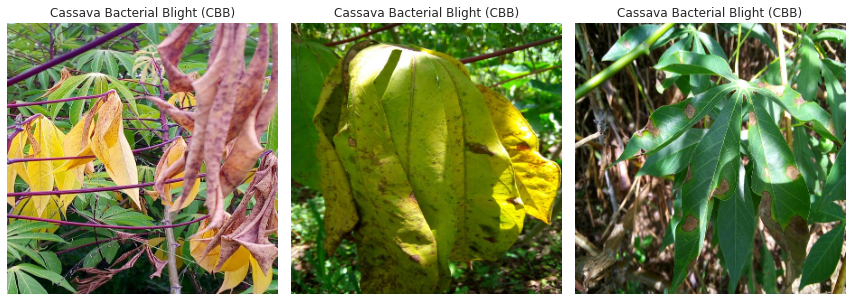

In [ ]:
plt.figure(figsize=(12, 7))
df_sample = train_dataset[train_dataset.label == 0].sample(3).reset_index(drop=True)
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(os.path.join(TRAIN_PATH, df_sample.image_id[i]))
    img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)
    plt.title(label_diseases_name.get(df_sample.label[i]))
plt.tight_layout()

plt.show()

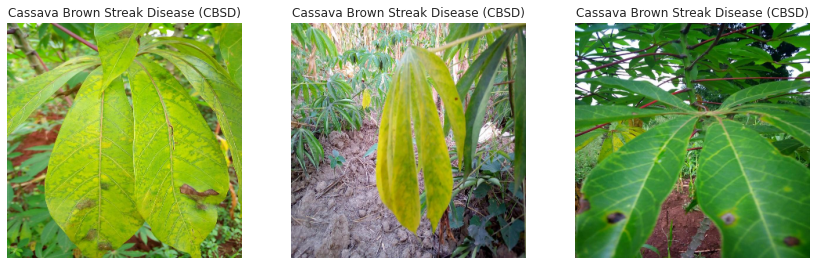

In [ ]:
plt.figure(figsize=(12, 7))
df_sample = train_dataset[train_dataset.label == 1].sample(3).reset_index(drop=True)
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(os.path.join(TRAIN_PATH, df_sample.image_id[i]))
    img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)
    plt.title(label_diseases_name.get(df_sample.label[i]))
plt.tight_layout()

plt.show()

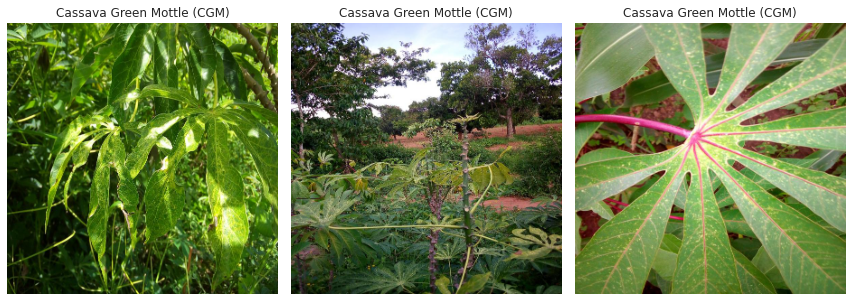

In [ ]:
plt.figure(figsize=(12, 7))
df_sample = train_dataset[train_dataset.label == 2].sample(3).reset_index(drop=True)
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(os.path.join(TRAIN_PATH, df_sample.image_id[i]))
    img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)
    plt.title(label_diseases_name.get(df_sample.label[i]))
plt.tight_layout()
plt.show()

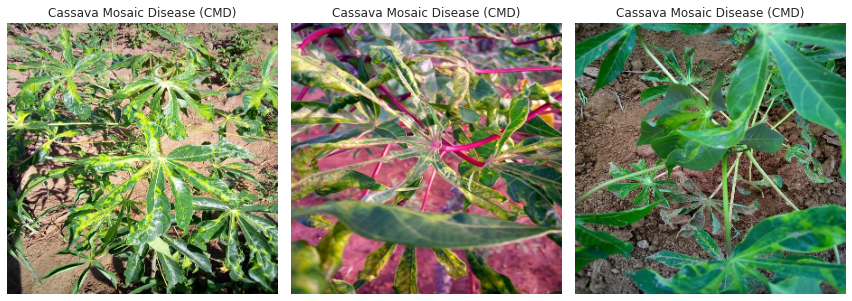

In [ ]:
plt.figure(figsize=(12, 7))
df_sample = train_dataset[train_dataset.label == 3].sample(3).reset_index(drop=True)
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(os.path.join(TRAIN_PATH, df_sample.image_id[i]))
    img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)
    plt.title(label_diseases_name.get(df_sample.label[i]))
plt.tight_layout()
plt.show()

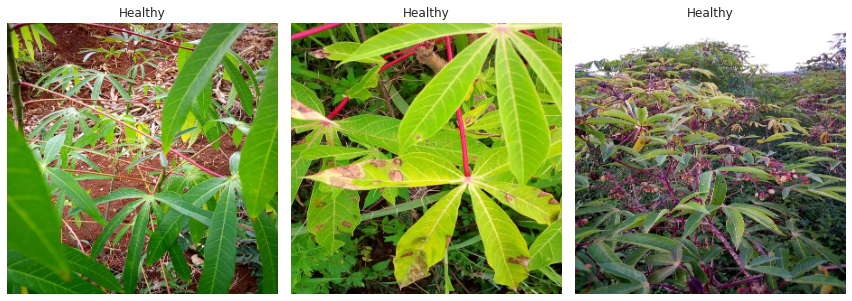

In [ ]:
plt.figure(figsize=(12, 7))
df_sample = train_dataset[train_dataset.label == 4].sample(3).reset_index(drop=True)
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(os.path.join(TRAIN_PATH, df_sample.image_id[i]))
    img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)
    plt.title(label_diseases_name.get(df_sample.label[i]))
plt.tight_layout()
plt.show()

# 5.Build model

##5.1.build model ResNet50

In [ ]:
base_model1 = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_width,img_height,3))


94773248/94765736 [==============================] - 1s 0us/step


##5.2.Build Model EfficientNetB5

In [ ]:
base_model2 = EfficientNetB5(include_top=False,weights='imagenet',input_shape= (img_width,img_height,3))

115269632/115263384 [==============================] - 1s 0us/step


In [ ]:
# Freeze all the layers
if  base_model1:
    num_freeze = 0
    for layer in base_model1.layers[:num_freeze]:

        layer.trainable = False

    # Check the trainable status of the individual layers

    for layer in base_model1.layers[num_freeze:]:
        layer.trainable = True
        print(layer, layer.trainable)
        
if base_model2:
    num_freeze = 0
    for layer in base_model2.layers[:num_freeze]:

        layer.trainable = False

    # Check the trainable status of the individual layers

    for layer in base_model2.layers[num_freeze:]:
        layer.trainable = True
        print(layer, layer.trainable)      



<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f2bfea54d10> True
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f2bfea58850> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2bfea58cd0> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f2bfdefb2d0> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f2bfde97d50> True
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f2bfdc43950> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f2bfdc43310> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2bfdc540d0> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f2bfdbe0790> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f2bfdbe0450> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2bfdbde7d0> True
<tensorflow.python.keras.layers.normaliz

##5.3.archicture model

In [ ]:
choix = input("Choix du modèle à tester: 1 pour Resnet50 | 2 pour EffiecientNetB5:  ")
if choix == "1":
    x = base_model1.output
    x = GlobalAveragePooling2D()(x)
    #x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x) # Adding a fully connected layer having 64 neurons
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model1.input, outputs=predictions)
      

    model.summary()
    print("Number of layers:", len(model.layers))

if choix == "2":
    x = base_model2.output
    x = GlobalAveragePooling2D()(x)
    #x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x) # Adding a fully connected layer having 64 neurons
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model2.input, outputs=predictions)
      

    model.summary()
    print("Number of layers:", len(model.layers))


Choix du modèle à tester: 1 pour Resnet50 | 2 pour EffiecientNetB5:  1
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_____________________




# 6.Compile model

In [ ]:
from keras import optimizers
 
# List useful only during parameter optimization
 
optimizers_list = [
    # SGD
   
    optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False),  # Gives the best results
    #optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=False),
    #optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=False),
  
    # Adam
   
    # optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6),
    #optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), 
    #optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6), 
    
  
 
]


# 7.Fit model

In [ ]:
loss = "categorical_crossentropy"
epochs = 100
batch_size = 64
class_weight = {0: 1.21, 1: 0.60, 2: 0.55, 3: 0.1, 4: 0.5} #permet de regler le probleme de desequibrage des donnees en affectant des poids dans chaque classe
for optimizer in optimizers_list:
 
   model.compile(optimizer= optimizer,
              loss=loss,
              metrics=['accuracy'])
    
   reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001 , verbose = 0)
   
   early_stopping =  EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

   SAVED_MODEL_PATH = "best_model_efficientNetB5_SGD_lr0.01_avec_aug_H_V_R_B_C.h5" 

   checkpoint_acc_callback = ModelCheckpoint(SAVED_MODEL_PATH, monitor='val_accuracy', verbose=0, save_best_only=True, 
                                save_weights_only=False, mode='max')

   history = model.fit(train,epochs=epochs,
                       validation_data=val,
                      #batch_size = batch_size,
                 
                      #class_weight = class_weight,
               
                    callbacks=[checkpoint_acc_callback, reduce_lr_callback,early_stopping]
                    )
 
    

Calcul pour l' index:  0

Epoch 1/100
215/215 [==============================] - 208s 718ms/step - loss: 1.2077 - accuracy: 0.5666 - val_loss: 1.4092 - val_accuracy: 0.4906
Epoch 2/100
215/215 [==============================] - 149s 695ms/step - loss: 0.9416 - accuracy: 0.6597 - val_loss: 1.2137 - val_accuracy: 0.6140
Epoch 3/100
215/215 [==============================] - 149s 693ms/step - loss: 0.8674 - accuracy: 0.6785 - val_loss: 1.7513 - val_accuracy: 0.2253
Epoch 4/100
215/215 [==============================] - 149s 694ms/step - loss: 0.8367 - accuracy: 0.6909 - val_loss: 1.3077 - val_accuracy: 0.5608
Epoch 5/100
215/215 [==============================] - 149s 693ms/step - loss: 0.7692 - accuracy: 0.7130 - val_loss: 1.2924 - val_accuracy: 0.4664
Epoch 6/100
215/215 [==============================] - 149s 694ms/step - loss: 0.7255 - accuracy: 0.7294 - val_loss: 1.7550 - val_accuracy: 0.1794
Epoch 7/100
215/215 [==============================] - 149s 692ms/step - loss: 0.7289 - accu

# 8.Evaluate model

##8.1.Courbe de perte et courbe de precision

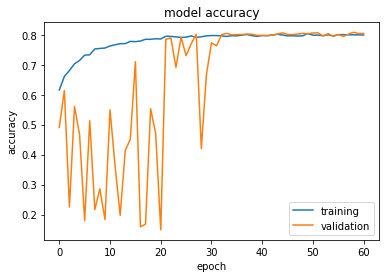

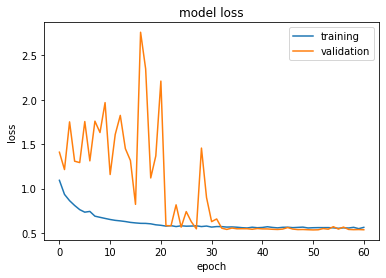

In [ ]:
director = '/content/drive/My Drive/Projet_PIF6004/Courbes/Resnet50/'
director1 = '/content/drive/My Drive/Projet_PIF6004/Courbes/EfficientNetB5/'
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
if not test_only:
   plt.savefig(director1 + 'SGD/lr0.01/avec_aug/' + 'model_accuracy_SGD_lr0.01_H_V_R_B_C.png')
plt.show()

# Plot curve for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
if not test_only:
    plt.savefig(director1 + 'SGD/lr0.01/avec_aug/' +'model_loss_SGD_lr0.01_H_V_R_B_C.png')
plt.show()


##8.2.Loss and  Accuracy 

In [ ]:
test_loss, test_acc = model.evaluate(test,verbose=1)
print("Loss: {}    ---    Accuracy: {}%".format(round(test_loss, 3), round(test_acc * 100, 2)  ))

4277/4277 [==============================] - 113s 26ms/step - loss: 0.5486 - accuracy: 0.7985
Loss: 0.549    ---    Accuracy: 79.85%


##8.3.evaluate model with saved model

In [ ]:
from keras.models import load_model

# delete model
del model

# Load best model
model = load_model(SAVED_MODEL_PATH)

loss, accuracy = model.evaluate(test)

print("Loss: {}    ---    Accuracy: {}%".format(round(loss, 3), round(accuracy * 100, 2)))

4277/4277 [==============================] - 114s 26ms/step - loss: 0.5511 - accuracy: 0.7999
Loss: 0.551    ---    Accuracy: 79.99%


##8.4.Confusion matrix

y_pred [4 4 4 ... 4 4 4]
y_true [0 0 0 ... 4 4 4]
Number of predicted of label 0 : 204


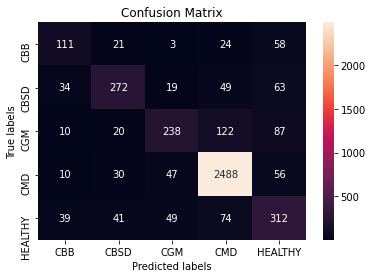

In [ ]:
#Confusion Matrix

# Install seaborn, for a fancy (heated) confusion matrix
director = '/content/drive/My Drive/Projet_PIF6004/Courbes/Resnet50/'
director1 = '/content/drive/My Drive/Projet_PIF6004/Courbes/EfficientNetB5/'

Y_pred = model.predict(x_test)
#print("Y_pred" ,Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print("y_pred", y_pred)

y_true = np.argmax(y_test,axis=1)

print("y_true", y_true)
pred_normal = [i for i in y_pred if i == 0]
print("Number of predicted of label 0 :", len(pred_normal))

cm = confusion_matrix(y_true, y_pred)  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['CBB', 'CBSD','CGM','CMD','HEALTHY']); ax.yaxis.set_ticklabels(['CBB', 'CBSD','CGM','CMD','HEALTHY']);
if not test_only:
  plt.savefig(director1 + "SGD/lr0.01/avec_aug/" + "confusion_matrix_SGD_lr0.01_H_V_R_B_C.png")

##8.5.Classification Report

In [ ]:
print('Classification Report')
target_names = ['CBB', 'CBSD','CGM','CMD','HEALTHY']

print(classification_report(y_true, y_pred, target_names=target_names))
if not test_only:
  director = '/content/drive/My Drive/Projet_PIF6004/Courbes/Resnet50/'
  director1 = '/content/drive/My Drive/Projet_PIF6004/Courbes/EfficientNetB5/'

  f = open(director1 + 'SGD/lr0.01/avec_aug/' +'ClassificationReport_SGD_lr0.01_H_V_R_B_C.txt','w')
  f.write(classification_report(y_true, y_pred, target_names=target_names))
  f.close()

Classification Report
              precision    recall  f1-score   support

         CBB       0.54      0.51      0.53       217
        CBSD       0.71      0.62      0.66       437
         CGM       0.67      0.50      0.57       477
         CMD       0.90      0.95      0.92      2631
     HEALTHY       0.54      0.61      0.57       515

    accuracy                           0.80      4277
   macro avg       0.67      0.64      0.65      4277
weighted avg       0.79      0.80      0.80      4277



# 9.Save Model and weight in Drive

In [ ]:
#model.save('Model_Projet_PIF6004/projet_PIF6004_1.h5')
if  not test_only:
  #!ls "/content/drive/My Drive"
  DL_dir = "/content/drive/My\ Drive/Projet_PIF6004/Model/EfficientNetB5/SGD/lr0.01/avec_aug"

  BEST_WEIGHTS = (DL_dir + "/efficient_weights_SGD_lr0.01_H_V_R_B_C.hd5").replace('\ ', ' ')
  BEST_MODEL = (DL_dir + "/" + SAVED_MODEL_PATH).replace('\ ', ' ')

  print(BEST_MODEL)

  model.save_weights(BEST_WEIGHTS)
  model.save(BEST_MODEL)


  !ls {DL_dir}
